In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
train = pd.read_csv(r"C:\Users\lenovo\Documents\Uma\data\bigmart sales hackathon data\train_v9rqX0R.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
test = pd.read_csv(r"C:\Users\lenovo\Documents\Uma\data\bigmart sales hackathon data\test_AbJTz2l.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
train['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [16]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace = True)

In [17]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
train['Outlet_Size'].fillna('Unknown', inplace = True)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [21]:
train.duplicated().sum()

0

In [22]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [25]:
train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}, inplace = True)

In [26]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [29]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace = True)

In [31]:
test['Outlet_Size'].fillna('Unknown', inplace = True)

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [33]:
test.duplicated().sum()

0

In [35]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [37]:
test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}, inplace = True)

In [38]:
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [43]:
train.groupby(['Item_Fat_Content', 'Item_Type']).Item_Visibility.mean()

Item_Fat_Content  Item_Type            
Low Fat           Baking Goods             0.066150
                  Breads                   0.067815
                  Breakfast                0.091970
                  Canned                   0.072913
                  Dairy                    0.069884
                  Frozen Foods             0.059118
                  Fruits and Vegetables    0.066488
                  Hard Drinks              0.064943
                  Health and Hygiene       0.055216
                  Household                0.061322
                  Meat                     0.056635
                  Others                   0.060241
                  Seafood                  0.049211
                  Snack Foods              0.069842
                  Soft Drinks              0.062768
                  Starchy Foods            0.066658
Regular           Baking Goods             0.072283
                  Breads                   0.064287
                  Breakf

In [44]:
test.groupby(['Item_Fat_Content', 'Item_Type']).Item_Visibility.mean()

Item_Fat_Content  Item_Type            
Low Fat           Baking Goods             0.060204
                  Breads                   0.076865
                  Breakfast                0.097813
                  Canned                   0.071302
                  Dairy                    0.068539
                  Frozen Foods             0.065312
                  Fruits and Vegetables    0.066630
                  Hard Drinks              0.066824
                  Health and Hygiene       0.058044
                  Household                0.057426
                  Meat                     0.052540
                  Others                   0.052117
                  Seafood                  0.040728
                  Snack Foods              0.069441
                  Soft Drinks              0.068057
                  Starchy Foods            0.071532
Regular           Baking Goods             0.071518
                  Breads                   0.072303
                  Breakf

<AxesSubplot:xlabel='Item_Fat_Content,Item_Type'>

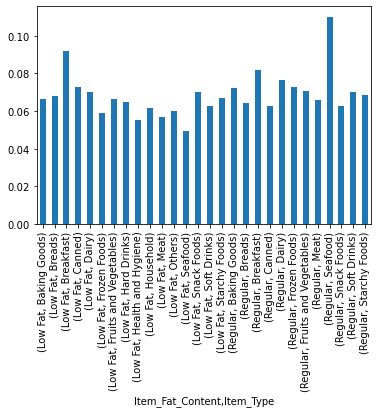

In [48]:
train.groupby(['Item_Fat_Content', 'Item_Type']).Item_Visibility.mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Item_Fat_Content,Item_Type'>

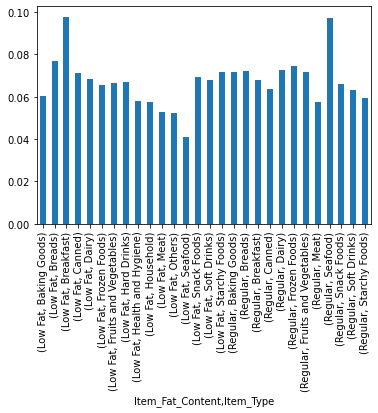

In [49]:
test.groupby(['Item_Fat_Content', 'Item_Type']).Item_Visibility.mean().plot(kind = 'bar')

In [54]:
train.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']).Outlet_Establishment_Year.mean()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small          1985.000000
                   Tier 3                Unknown        1998.000000
Supermarket Type1  Tier 1                Medium         1999.000000
                                         Small          1997.000000
                   Tier 2                Small          2004.000000
                                         Unknown        2004.495957
                   Tier 3                High           1987.000000
Supermarket Type2  Tier 3                Medium         2009.000000
Supermarket Type3  Tier 3                Medium         1985.000000
Name: Outlet_Establishment_Year, dtype: float64

In [55]:
test.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']).Outlet_Establishment_Year.mean()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small          1985.000000
                   Tier 3                Unknown        1998.000000
Supermarket Type1  Tier 1                Medium         1999.000000
                                         Small          1997.000000
                   Tier 2                Small          2004.000000
                                         Unknown        2004.495955
                   Tier 3                High           1987.000000
Supermarket Type2  Tier 3                Medium         2009.000000
Supermarket Type3  Tier 3                Medium         1985.000000
Name: Outlet_Establishment_Year, dtype: float64

<AxesSubplot:xlabel='Outlet_Type,Outlet_Location_Type,Outlet_Size'>

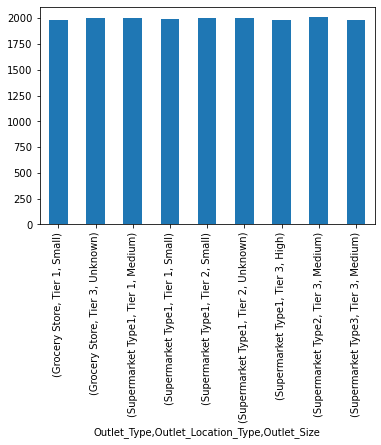

In [56]:
train.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']).Outlet_Establishment_Year.mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Outlet_Type,Outlet_Location_Type,Outlet_Size'>

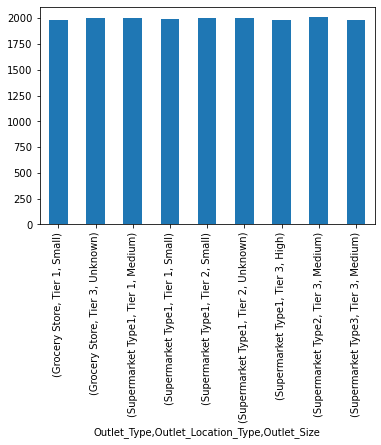

In [58]:
test.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']).Outlet_Establishment_Year.mean().plot(kind = 'bar')

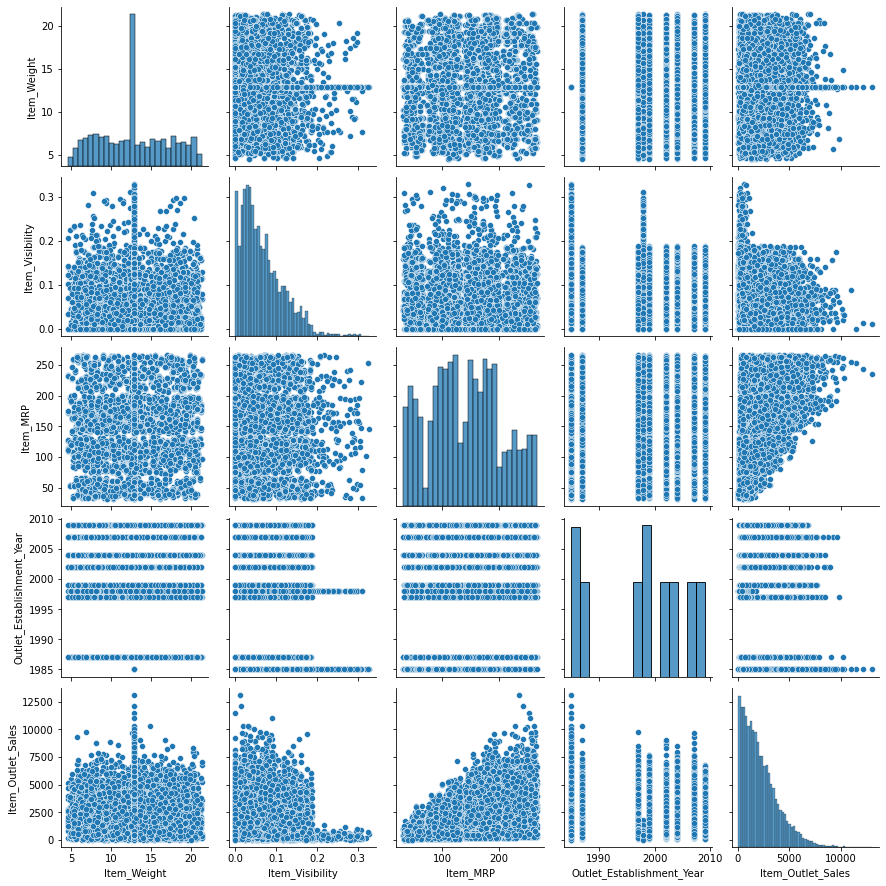

In [59]:
sns.pairplot(train)

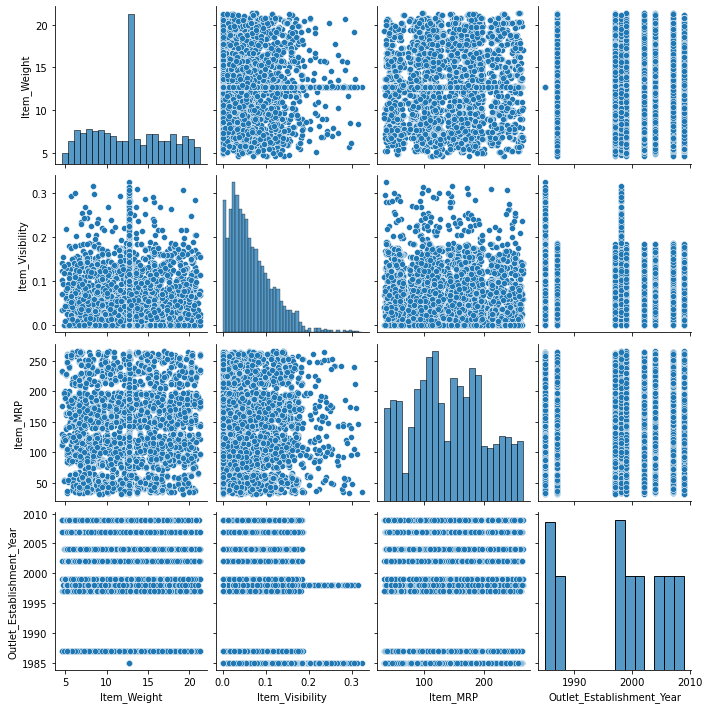

In [60]:
sns.pairplot(test)

In [63]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [64]:
test.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.016380,0.045257,0.013548
Item_Visibility,-0.016380,1.000000,-0.014013,-0.097040
Item_MRP,0.045257,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.013548,-0.097040,-0.007233,1.000000


In [65]:
train.groupby('Item_MRP').Item_Outlet_Sales.mean()

Item_MRP
31.2900      898.8300
31.4900      466.0600
31.8900      366.1900
31.9558      679.1160
32.0558     1018.6740
              ...    
266.1884    4239.8144
266.2884    2914.8724
266.5884    3974.8260
266.6884    2119.9072
266.8884    3047.3666
Name: Item_Outlet_Sales, Length: 5938, dtype: float64

<AxesSubplot:>

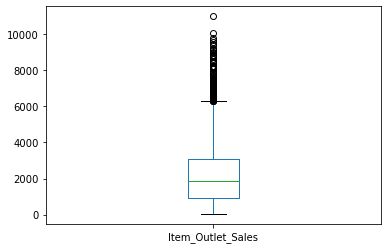

In [70]:
train.groupby('Item_MRP').Item_Outlet_Sales.mean().plot(kind = 'box')

<AxesSubplot:>

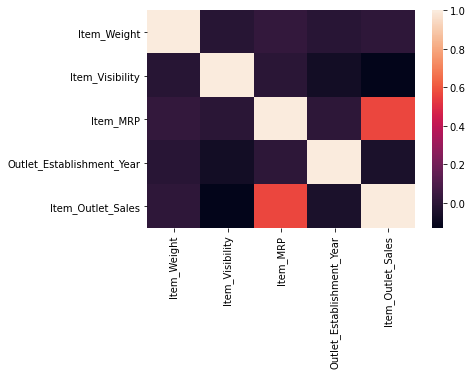

In [76]:
sns.heatmap(train.corr())

<AxesSubplot:>

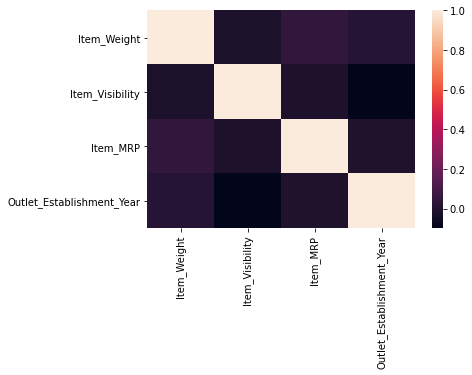

In [77]:
sns.heatmap(test.corr())

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

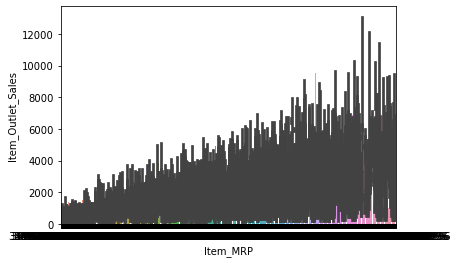

In [81]:
sns.barplot('Item_MRP', 'Item_Outlet_Sales', data = train )

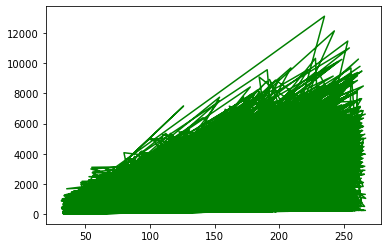

In [86]:
plt.plot('Item_MRP', 'Item_Outlet_Sales', data = train, color = 'green'  )

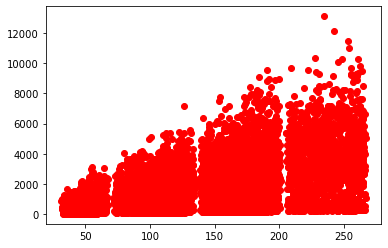

In [88]:
plt.scatter('Item_MRP', 'Item_Outlet_Sales', data = train, color = 'red'  )

In [94]:
numerical = train.select_dtypes(include = np.number)
numerical[0:2]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [98]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [139]:
categorical = train.select_dtypes(exclude = np.number).drop(columns = ['Item_Identifier', 'Outlet_Identifier'])
categorical[0:2]

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2


In [140]:
cat_preprocessed = pd.get_dummies(categorical)
cat_preprocessed.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [141]:
numerical_pre = pd.DataFrame(numerical, columns = numerical.columns)
numerical_pre[0:2]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [152]:
preprocessed = pd.concat([numerical_pre,cat_preprocessed,train[['Item_Identifier', 'Outlet_Identifier']]], axis = 1)
preprocessed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier,Outlet_Identifier
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,1,0,0,0,1,0,0,FDA15,OUT049
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,0,0,1,0,0,1,0,DRC01,OUT018
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,1,0,0,0,1,0,0,FDN15,OUT049
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,1,0,0,1,1,0,0,0,FDX07,OUT010
4,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,0,0,0,1,0,1,0,0,NCD19,OUT013


In [133]:
numerical_test = test.select_dtypes(include = np.number)
numerical_test[0:2]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.75,0.007565,107.8622,1999
1,8.30,0.038428,87.3198,2007


In [153]:
categorical_test = test.select_dtypes(exclude = np.number).drop(columns = ['Item_Identifier', 'Outlet_Identifier'])
categorical_test[0:2]

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Snack Foods,Medium,Tier 1,Supermarket Type1
1,Regular,Dairy,Unknown,Tier 2,Supermarket Type1


In [154]:
cat_preprocessed_test = pd.get_dummies(categorical_test)
cat_preprocessed_test.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [155]:
numerical_pre_test = pd.DataFrame(numerical_test, columns = numerical_test.columns)
numerical_pre_test[0:2]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.75,0.007565,107.8622,1999
1,8.30,0.038428,87.3198,2007


In [156]:
preprocessed_test = pd.concat([numerical_pre_test,cat_preprocessed_test,test[['Item_Identifier','Outlet_Identifier']]], axis = 1)
preprocessed_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier,Outlet_Identifier
0,20.750000,0.007565,107.8622,1999,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,FDW58,OUT049
1,8.300000,0.038428,87.3198,2007,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,FDW14,OUT017
2,14.600000,0.099575,241.7538,1998,1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,NCN55,OUT010
3,7.315000,0.015388,155.0340,2007,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,FDQ58,OUT017
4,12.695633,0.118599,234.2300,1985,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,FDY38,OUT027


In [164]:
model = LinearRegression()
X_train = preprocessed.drop(columns = ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])
y_train = preprocessed['Item_Outlet_Sales']
model.fit(X_train, y_train)

LinearRegression()

In [165]:
y_train_pred = model.predict(X_train)
y_train_pred

array([4019.11911516,  561.86838601, 2370.97981212, ..., 1526.20279873,
       1393.18922501, 1210.17755884])

In [177]:
mse = mean_squared_error(y_train, y_train_pred)
mse

1270228.5686310087

In [166]:
X_test = preprocessed_test.drop(columns = ['Item_Identifier', 'Outlet_Identifier'])

In [167]:
y_test_pred = model.predict(X_test)

In [168]:
y_test_pred

array([1835.76091502, 1531.50296273, 1881.66025009, ..., 1824.37530058,
       3587.37688271, 1285.68376058])

In [170]:
submission = pd.read_csv(r"C:\Users\lenovo\Documents\Uma\data\bigmart sales hackathon data\sample_submission_8RXa3c6.csv")
submission[0:2]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000


In [171]:
submission['Item_Outlet_Sales'] = y_test_pred


In [173]:
submission['Item_Outlet_Sales'] = np.abs(y_test_pred)


In [174]:
submission['Item_Identifier']= test['Item_Identifier']

In [175]:
submission['Outlet_Identifier']= test['Outlet_Identifier']

In [176]:
submission.to_csv('bigmart sales prediction.csv', index = False)